<a href="https://colab.research.google.com/github/ProTeni/MSC_Program-Comp-Data-Science-Sunderland/blob/master/Machine_Learning%20%26%20Data_Mining-CETM20/practice_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
x = np.ones(shape=(2,2))
x[0,0] = 0
x

array([[0., 1.],
       [1., 1.]])

In [13]:
import tensorflow as tf
x = tf.ones(shape=(2,2))
x

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1., 1.],
       [1., 1.]], dtype=float32)>

In [14]:
x[0,0]=0
# to validate that tensorflow tensors are not be assignable

TypeError: 'tensorflow.python.framework.ops.EagerTensor' object does not support item assignment

In [15]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3,1)))

print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[ 2.1040745],
       [-2.200863 ],
       [-1.142649 ]], dtype=float32)>


In [16]:
#a state of a tensorflow tensor can be assigned via its "assign" method

v.assign(tf.ones((3,1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

In [17]:
v[0, 0].assign(3)
#assigning a value to be a subset of a TensorFlow variable

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

In [18]:
v.assign_add(tf.ones((3,1)))

#basically add ones as per tf.ones to all rows - 3 and all the cureent col- which is 1

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

In [19]:
v.assign_sub(tf.ones((3,1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

Mathematical Operations

In [20]:
a = tf.ones((4,1))
a

<tf.Tensor: shape=(4, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.]], dtype=float32)>

In [21]:
b = tf.square(a)
b

<tf.Tensor: shape=(4, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.]], dtype=float32)>

In [22]:
c = tf.sqrt(b)
c

<tf.Tensor: shape=(4, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.]], dtype=float32)>

In [23]:
d = b+c
d

<tf.Tensor: shape=(4, 1), dtype=float32, numpy=
array([[2.],
       [2.],
       [2.],
       [2.]], dtype=float32)>

In [24]:
e = tf.matmul(a, tf.transpose(b))
e

<tf.Tensor: shape=(4, 4), dtype=float32, numpy=
array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]], dtype=float32)>

In [25]:
e *=d

To Understand Better

In [26]:
input_var = tf.Variable(initial_value=3)
with tf.GradientTape() as tape:
  result = tf.square(input_var)
gradient = tape.gradient(result, input_var)

In [27]:
input_const = tf.constant(3)
with tf.GradientTape() as tape:
  tape.watch(input_const)
  result = tf.square(input_const)
gradient = tape.gradient(result, input_const)

In [28]:
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
  with tf.GradientTape() as inner_tape:
    position = 4.9 * time ** 2
  speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)

In [29]:
num_samples_per_class = 1000

negative_samples = np.random.multivariate_normal(
    mean=[0,3],
    cov=[[1,0.5],[0.5,1]],
    size=num_samples_per_class)

positive_samples = np.random.multivariate_normal(
    mean=[3,0],
    cov=[[1,0.5],[0.5,1]],
    size=num_samples_per_class)


#np.random.multivaraiet_normal?


In [30]:
negative_samples

array([[ 1.58536896,  3.74215491],
       [ 0.79821738,  3.61912755],
       [-0.86377281,  1.26303181],
       ...,
       [ 0.02996686,  4.29545314],
       [ 1.33886851,  4.34436368],
       [-0.82880504,  2.00557279]], shape=(1000, 2))

In [31]:
positive_samples

array([[ 3.9980084 ,  0.88950225],
       [ 1.29371198,  0.89072331],
       [ 1.9909866 , -1.07111738],
       ...,
       [ 2.2579118 ,  0.06092106],
       [ 2.34713342, -1.40360949],
       [ 2.64164488, -1.78651379]], shape=(1000, 2))

In [32]:
negative_samples.shape

(1000, 2)

In [33]:
positive_samples.shape

(1000, 2)

In [34]:
positive_samples.dtype

dtype('float64')

In [35]:
#to stack both smaples on each o
input = np.vstack((negative_samples, positive_samples)).astype(np.float32)

input

array([[ 1.585369  ,  3.7421548 ],
       [ 0.79821736,  3.6191275 ],
       [-0.8637728 ,  1.2630318 ],
       ...,
       [ 2.2579117 ,  0.06092106],
       [ 2.3471334 , -1.4036095 ],
       [ 2.641645  , -1.7865138 ]], shape=(2000, 2), dtype=float32)

In [36]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

targets

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]], shape=(2000, 1), dtype=float32)

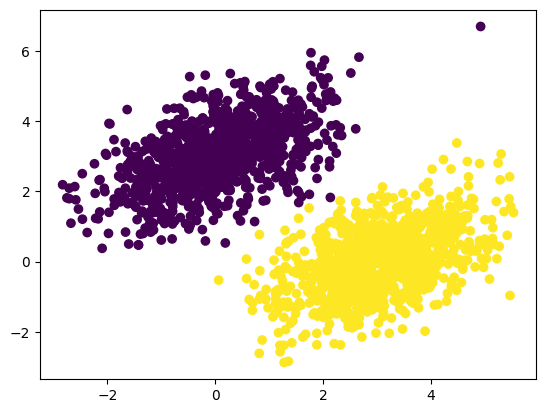

In [37]:
import matplotlib.pyplot as plt
plt.scatter(input[:,0], input[:, 1], c=targets[:,0])

plt.show()

A linear classifier is an affine transformation (prediction = W • input + b)

In [38]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

Forward Pass Function

In [39]:
def model(inputs):
  return tf.matmul(inputs, W) + b

In [40]:
def square_loss(targest, predictions):
  per_sample_losses = tf.square(targets-predictions)
  return tf.reduce_mean(per_sample_losses)

  #tf.reduce_mean?

Th Training Step Function

In [41]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

or simplicity, we’ll do batch training instead of mini-batch training: we’ll run each training step (gradient computation and weight update) for all the data, rather than iterate over the data in small batches. On one hand, this means that each training step will take much longer to run, since we’ll compute the forward pass and the gradients for 2,000 samples at once. On the other hand, each gradient update will be much more effective at reducing the loss on the training data, since it will encompass information from all training samples instead of, say, only 128 random samples. As a result, we will need many fewer steps of training, and we should use a larger learning rate than we would typically use for mini-batch training (we’ll use learning_rate = 0.1, defined in listing 3.20).

---
The Batch Training Loop

In [42]:
for step in range(40):
  loss = training_step(input, targets)
  print(f"loss at step {step}: {loss:.4f}")


loss at step 0: 5.7173
loss at step 1: 0.6380
loss at step 2: 0.2032
loss at step 3: 0.1412
loss at step 4: 0.1257
loss at step 5: 0.1165
loss at step 6: 0.1088
loss at step 7: 0.1017
loss at step 8: 0.0952
loss at step 9: 0.0893
loss at step 10: 0.0838
loss at step 11: 0.0788
loss at step 12: 0.0743
loss at step 13: 0.0701
loss at step 14: 0.0662
loss at step 15: 0.0627
loss at step 16: 0.0594
loss at step 17: 0.0564
loss at step 18: 0.0537
loss at step 19: 0.0512
loss at step 20: 0.0489
loss at step 21: 0.0468
loss at step 22: 0.0449
loss at step 23: 0.0431
loss at step 24: 0.0415
loss at step 25: 0.0400
loss at step 26: 0.0386
loss at step 27: 0.0374
loss at step 28: 0.0362
loss at step 29: 0.0352
loss at step 30: 0.0342
loss at step 31: 0.0333
loss at step 32: 0.0325
loss at step 33: 0.0318
loss at step 34: 0.0311
loss at step 35: 0.0305
loss at step 36: 0.0299
loss at step 37: 0.0294
loss at step 38: 0.0289
loss at step 39: 0.0284


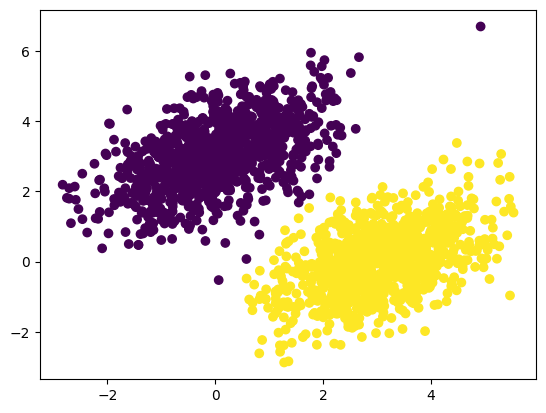

In [43]:
predictions = model(input)

plt.scatter(input[:, 0], input[:,1], c=predictions[:,0]>0.5)

plt.show()

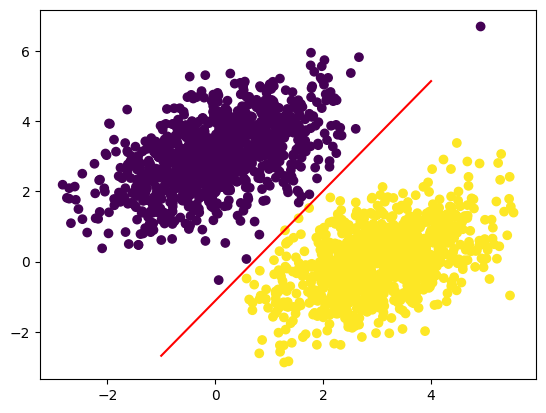

In [44]:
x = np.linspace(-1, 4, 100)
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(input[:, 0], input[:, 1], c=predictions[:, 0] > 0.5)

## <span style= "color: #82C8E5;"> IMDB Binary Classification w Neural Networks </span>

In [45]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [46]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [47]:
train_labels[0]

np.int64(1)

In [48]:
for sequence in train_data:
  print(max(sequence))

7486
9837
6905
9941
7224
7982
9363
9820
7612
8419
8914
7412
9667
9106
6640
9671
9263
9935
8742
9580
9859
8793
7609
9462
9075
8614
8887
5898
9637
9212
9771
9209
8257
7778
9877
9753
7015
9902
8427
8867
8406
9579
9529
7056
7023
9922
5811
9124
9910
8795
7799
7146
9978
7999
9565
9731
9095
9888
5247
9655
4852
9939
9018
9885
7239
9636
9389
9561
9673
9147
9956
9448
8520
9360
9765
9025
9928
8352
9960
7320
8318
7881
9715
9851
9266
9055
8894
9719
9271
7311
8791
9918
9486
9867
9283
7707
9133
9055
9978
8013
8448
8700
9906
7517
9962
6266
6903
9815
9976
9273
9413
8931
8631
9685
9419
9964
7361
9052
9482
9643
9865
9819
7181
2775
9709
9977
8916
4431
9700
6532
8836
9926
6781
7614
5418
8881
9841
9615
9072
9831
6891
8827
9019
9583
8776
8534
9853
8368
8931
9830
8084
5991
7901
9671
6817
9937
7960
7676
8653
6866
6325
9737
9771
5636
8557
7371
9995
8689
9294
8893
8462
6975
9665
8802
7608
9933
9738
9418
7542
7073
8448
9570
9916
9315
7806
9901
9388
9723
9049
9985
8427
8376
9985
9584
9426
9840
9208
8648
9675
9608


In [49]:
max([max(sequence) for sequence in train_data])


9999

In [50]:
word_index = imdb.get_word_index()
word_index

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [51]:
reverse_word_index = [(value, key) for (key, value) in word_index.items()]
reverse_word_index

[(34701, 'fawn'),
 (52006, 'tsukino'),
 (52007, 'nunnery'),
 (16816, 'sonja'),
 (63951, 'vani'),
 (1408, 'woods'),
 (16115, 'spiders'),
 (2345, 'hanging'),
 (2289, 'woody'),
 (52008, 'trawling'),
 (52009, "hold's"),
 (11307, 'comically'),
 (40830, 'localized'),
 (30568, 'disobeying'),
 (52010, "'royale"),
 (40831, "harpo's"),
 (52011, 'canet'),
 (19313, 'aileen'),
 (52012, 'acurately'),
 (52013, "diplomat's"),
 (25242, 'rickman'),
 (6746, 'arranged'),
 (52014, 'rumbustious'),
 (52015, 'familiarness'),
 (52016, "spider'"),
 (68804, 'hahahah'),
 (52017, "wood'"),
 (40833, 'transvestism'),
 (34702, "hangin'"),
 (2338, 'bringing'),
 (40834, 'seamier'),
 (34703, 'wooded'),
 (52018, 'bravora'),
 (16817, 'grueling'),
 (1636, 'wooden'),
 (16818, 'wednesday'),
 (52019, "'prix"),
 (34704, 'altagracia'),
 (52020, 'circuitry'),
 (11585, 'crotch'),
 (57766, 'busybody'),
 (52021, "tart'n'tangy"),
 (14129, 'burgade'),
 (52023, 'thrace'),
 (11038, "tom's"),
 (52025, 'snuggles'),
 (29114, 'francesco'),

In [52]:
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]]
    )


AttributeError: 'list' object has no attribute 'get'

In [ ]:
#word_index = imdb.get_word_index()                                ❶
#reverse_word_index = dict(
 #   [(value, key) for (key, value) in word_index.items()])        ❷
#decoded_review = " ".join(
 #   [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

In [ ]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [ ]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

Defining the Model

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
                          ])

Compiling the Model with "Loss, Optimizer & Metrics"

In [ ]:
model.compile(
    optimizer="rmsprop",
    loss ="binary_crossentropy",
    metrics = ["accuracy"]
)

Setting Aside a Validation Set

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 157ms/step - accuracy: 0.6749 - loss: 0.6379 - val_accuracy: 0.8491 - val_loss: 0.4685
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - accuracy: 0.8731 - loss: 0.4143 - val_accuracy: 0.8757 - val_loss: 0.3490
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - accuracy: 0.9028 - loss: 0.2956 - val_accuracy: 0.8827 - val_loss: 0.3041
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9229 - loss: 0.2300 - val_accuracy: 0.8782 - val_loss: 0.3018
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9381 - loss: 0.1910 - val_accuracy: 0.8878 - val_loss: 0.2763
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9516 - loss: 0.1554 - val_accuracy: 0.8863 - val_loss: 0.2781
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9585 - loss: 0.1377 - val_accuracy: 0.8831 - val_loss: 0.2990
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9663 - loss: 0.1188 - val_accuracy: 0.8831 - 

In [ ]:
history_dict = history.history

In [ ]:
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Plotting the Training and Validation Loss


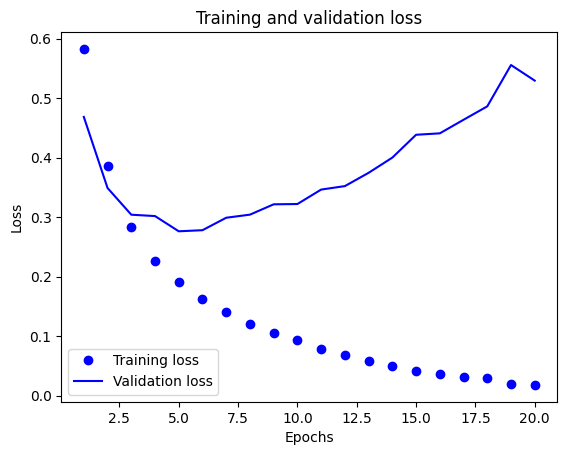

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


#"bo" is for "blue dot."

#"b" is for "solid blue line."

Plotting the Training and Validation Accuracy

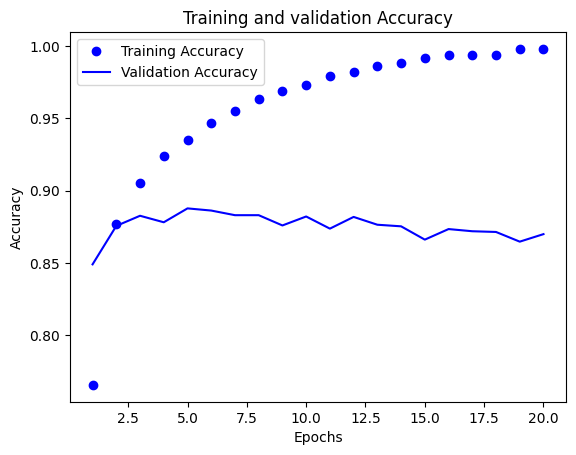

In [ ]:
history_dict = history.history
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]

plt.plot(epochs, acc, "bo", label="Training Accuracy")
plt.plot(epochs, val_acc, "b", label="Validation Accuracy")
plt.title("Training and validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

From the above, it appears that the model stops earning at epoch 4.

Although, the loss and accuracy graph of the training data appears perfect- less and lesser loss values as the epoch rises, and hugher and higher accuracy score as the epoch rises.


However, for the validation set, the epoch appears to reach its maxumium accuracy vale at epoch 4, and the least in loss value at same (epoch 4).

To retain the data, the only value to be optimized will be the poch value from 20 to 4

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

model.fit(x_train,
          y_train,
          epochs=4,
          batch_size=512)


results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.7289 - loss: 0.5719
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8986 - loss: 0.3039
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9220 - loss: 0.2252
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.9352 - loss: 0.1888
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8840 - loss: 0.2853


In [ ]:
results

[0.28317227959632874, 0.8866000175476074]

In [ ]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([[0.24329704],
       [0.9982217 ],
       [0.90720767],
       ...,
       [0.12607716],
       [0.10887961],
       [0.64776564]], dtype=float32)

Experimenting:

- More input values
- More layers
- A different loss value- say MSE
- A diff activation from relu; say tanh

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

model.fit(x_train,
          y_train,
          epochs=4,
          batch_size=512)


results = model.evaluate(x_test, y_test)

---

Simple holdout validation

;
- Best when the data 




`num_validation_samples = 10000 
np.random.shuffle(data)                                   ❶
validation_data = data[:num_validation_samples]           ❷
training_data = data[num_validation_samples:]             ❸
model = get_model()                                       ❹
model.fit(training_data, ...)                             ❹
validation_score = model.evaluate(validation_data, ...)   ❹
 
...                                                       ❺
 
model = get_model()                                       ❻
model.fit(np.concatenate([training_data,                  ❻
                          validation_data]), ...)         ❻
test_score = model.evaluate(test_data, ...) `


❶ Shuffling the data is usually appropriate.

❷ Defines the validation set

❸ Defines the training set

❹ Trains a model on the training data, and evaluates it on the validation data

❺ At this point you can tune your model, retrain it, evaluate it, tune it again.

❻ Once you’ve tuned your hyperparameters, it’s common to train your final model from scratch on all non-test data available.

This is the simplest evaluation protocol, and it suffers from one flaw: if little data is available, then your validation and test sets may contain too few samples to be statistically representative of the data at hand. This is easy to recognize: if different random shuffling rounds of the data before splitting end up yielding very different measures of model performance, then you’re having this issue. K-fold validation and iterated K-fold validation are two ways to address this, as discussed next.

In [ ]:
from sklearn.datasets import load_sample_images
import tensorflow as tf

images = load_sample_images()["images"]
images = tf.keras.layers.CenterCrop(height=70, width=120)(images)
images = tf.keras.layers.Rescaling(scale=1 / 255)(images)

In [ ]:
images.shape

TensorShape([2, 70, 120, 3])

In [ ]:
images.ndim

4

In [ ]:
conv_layer = tf.keras.layers.Conv2D(filters=32, kernel_size=7)
fmaps = conv_layer(images)

In [ ]:
fmaps.shape

TensorShape([2, 64, 114, 32])

In [ ]:
conv_layer = tf.keras.layers.Conv2D(filters=32, kernel_size=7,padding="same")
fmaps = conv_layer(images)
fmaps.shape

TensorShape([2, 70, 120, 32])

In [ ]:
kernels, biases = conv_layer.get_weights()
kernels.shape

(7, 7, 3, 32)

In [ ]:
biases.shape

(32,)

---

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow import keras

# 1. Load and Explore Data
df = pd.read_csv('financial_data.csv')
print(df.info())
print(df['target'].value_counts())
# ... exploration plots ...

# 2. Preprocess
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) # Important: use fit_transform on train only

# 3. Define, Train, and Evaluate Models
def create_model(hidden_layers):
    model = keras.Sequential()
    model.add(keras.layers.InputLayer(input_shape=(X_train.shape[1],)))
    for nodes in hidden_layers:
        model.add(keras.layers.Dense(nodes, activation='relu')) # Using ReLU
    model.add(keras.layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Experiment: Test different architectures
architectures = [ (50,), (100,), (50, 50), (100, 50) ]
history_dict = {}
for arch in architectures:
    print(f"\nTraining model with architecture: {arch}")
    model = create_model(arch)
    history = model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2, verbose=0)
    history_dict[arch] = history
    # Plot learning curves for this model
    plt.plot(history.history['val_loss'], label=str(arch))
plt.title('Validation Loss for Different Architectures')
plt.legend()
plt.show()

# 4. Evaluate Best Model on Test Set
best_arch = (100, 50) # Chosen based on lowest stable validation loss
best_model = create_model(best_arch)
best_model.fit(X_train_scaled, y_train, epochs=100, verbose=0) # Train on full training set
test_loss, test_accuracy = best_model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

# 5. Detailed Analysis
y_pred = (best_model.predict(X_test_scaled) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))